#Author- TUSHAR KHETE

In [64]:
print("Hello world !")

Hello world !


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

## To build and train a simple artificial neural network model to detect spam/fake Instagram accounts. Fake and spam accounts are a major problem in social media. Many social media influencers use fake Instagram accounts to create an illusion of having so many social media followers. Fake accounts can be used to impersonate or catfish other people and be used to sell fake services/products.   


# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
# !pip install tensorflow==2.0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [5]:
data_train= pd.read_csv("/content/sample_data/insta_train.csv")

In [6]:
data_train.head

<bound method NDFrame.head of      profile pic  nums/length username  ...  #follows  fake
0              1                  0.27  ...       955     0
1              1                  0.00  ...       533     0
2              1                  0.10  ...        98     0
3              1                  0.00  ...       651     0
4              1                  0.00  ...       126     0
..           ...                   ...  ...       ...   ...
571            1                  0.55  ...       596     1
572            1                  0.38  ...        75     1
573            1                  0.57  ...       339     1
574            1                  0.57  ...        73     1
575            1                  0.27  ...       487     1

[576 rows x 12 columns]>

In [7]:
data_train.info

<bound method DataFrame.info of      profile pic  nums/length username  ...  #follows  fake
0              1                  0.27  ...       955     0
1              1                  0.00  ...       533     0
2              1                  0.10  ...        98     0
3              1                  0.00  ...       651     0
4              1                  0.00  ...       126     0
..           ...                   ...  ...       ...   ...
571            1                  0.55  ...       596     1
572            1                  0.38  ...        75     1
573            1                  0.57  ...       339     1
574            1                  0.57  ...        73     1
575            1                  0.27  ...       487     1

[576 rows x 12 columns]>

In [8]:
data_test= pd.read_csv("/content/sample_data/insta_test.csv")

In [9]:
data_test.describe

<bound method NDFrame.describe of      profile pic  nums/length username  ...  #follows  fake
0              1                  0.33  ...       604     0
1              1                  0.00  ...         6     0
2              1                  0.00  ...       668     0
3              1                  0.00  ...      7369     0
4              1                  0.50  ...       356     0
..           ...                   ...  ...       ...   ...
115            1                  0.29  ...       811     1
116            1                  0.40  ...       164     1
117            1                  0.00  ...      3572     1
118            0                  0.17  ...      1695     1
119            1                  0.44  ...        68     1

[120 rows x 12 columns]>

In [10]:
data_test.isnull

<bound method DataFrame.isnull of      profile pic  nums/length username  ...  #follows  fake
0              1                  0.33  ...       604     0
1              1                  0.00  ...         6     0
2              1                  0.00  ...       668     0
3              1                  0.00  ...      7369     0
4              1                  0.50  ...       356     0
..           ...                   ...  ...       ...   ...
115            1                  0.29  ...       811     1
116            1                  0.40  ...       164     1
117            1                  0.00  ...      3572     1
118            0                  0.17  ...      1695     1
119            1                  0.44  ...        68     1

[120 rows x 12 columns]>

In [11]:
data_test.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
5,1,0.00,1,0.00,0,0,0,1,6,362,424,0
6,1,0.00,1,0.00,0,132,0,1,9,213,254,0
7,1,0.00,2,0.00,0,0,0,1,19,552,521,0
8,1,0.00,2,0.00,0,96,0,1,17,122,143,0
9,1,0.00,1,0.00,0,78,0,1,9,834,358,0


In [12]:
data_test.tail(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
110,1,0.00,1,0.00,0,0,0,0,1,193,669,1
111,1,0.00,1,0.25,0,0,0,0,0,49,235,1
112,0,0.44,1,0.00,0,0,0,0,0,13,7,1
113,1,0.45,1,0.40,0,0,0,0,2,74,270,1
114,1,0.33,1,0.00,0,0,0,0,8,88,76,1
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.00,0,0,0,0,3,39,68,1


In [13]:
data_train.head(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [14]:
data_train.tail(10)

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
566,1,0.27,1,0.00,0,19,0,0,8,126,860,1
567,1,0.25,1,0.00,0,0,0,1,102,39,229,1
568,1,0.43,1,0.00,0,5,0,0,6,66,161,1
569,1,0.31,3,0.00,0,0,0,0,25,87,698,1
570,1,0.20,1,0.00,0,28,0,0,0,15,64,1
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [15]:
# Getting dataframe info
data_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [16]:
data_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [17]:
data_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [18]:
data_test['profile pic'].value_counts()


1    91
0    29
Name: profile pic, dtype: int64

In [19]:
data_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64


-exploratory data analysis on the testing dataset

In [20]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [21]:
data_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [22]:
data_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [23]:
data_train['profile pic'].value_counts()


1    404
0    172
Name: profile pic, dtype: int64

In [24]:
data_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

# TASK #4: PERFORM DATA VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


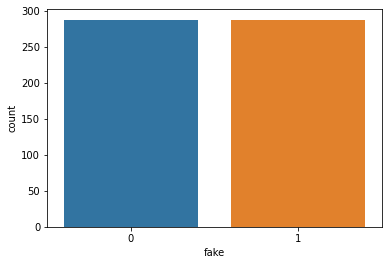

In [25]:
# Visualize the data
sns.countplot(data_train['fake'])




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


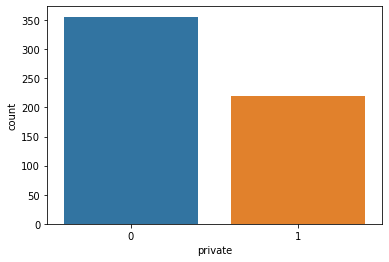

In [26]:
sns.countplot(data_train['private'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


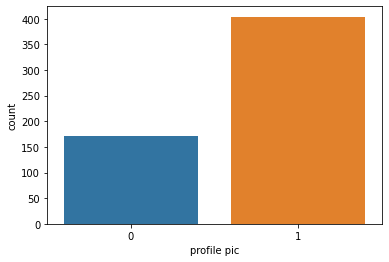

In [27]:

sns.countplot(data_train['profile pic'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


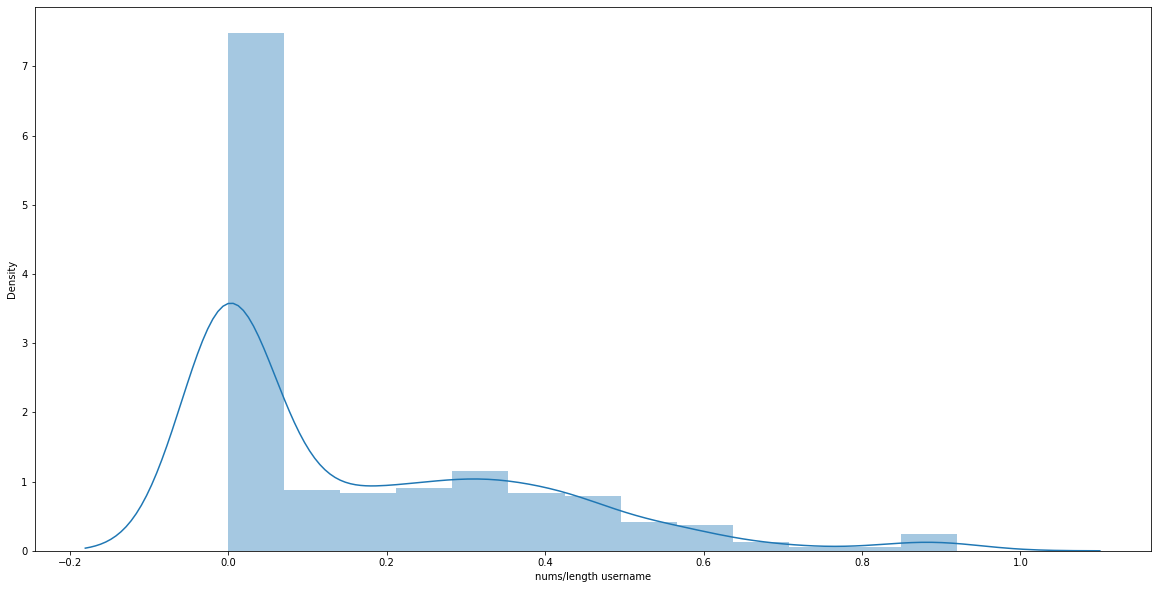

In [28]:
# Visualize the data
plt.figure(figsize = (20, 10))
sns.distplot(data_train['nums/length username'])


<Figure size 1440x1440 with 0 Axes>

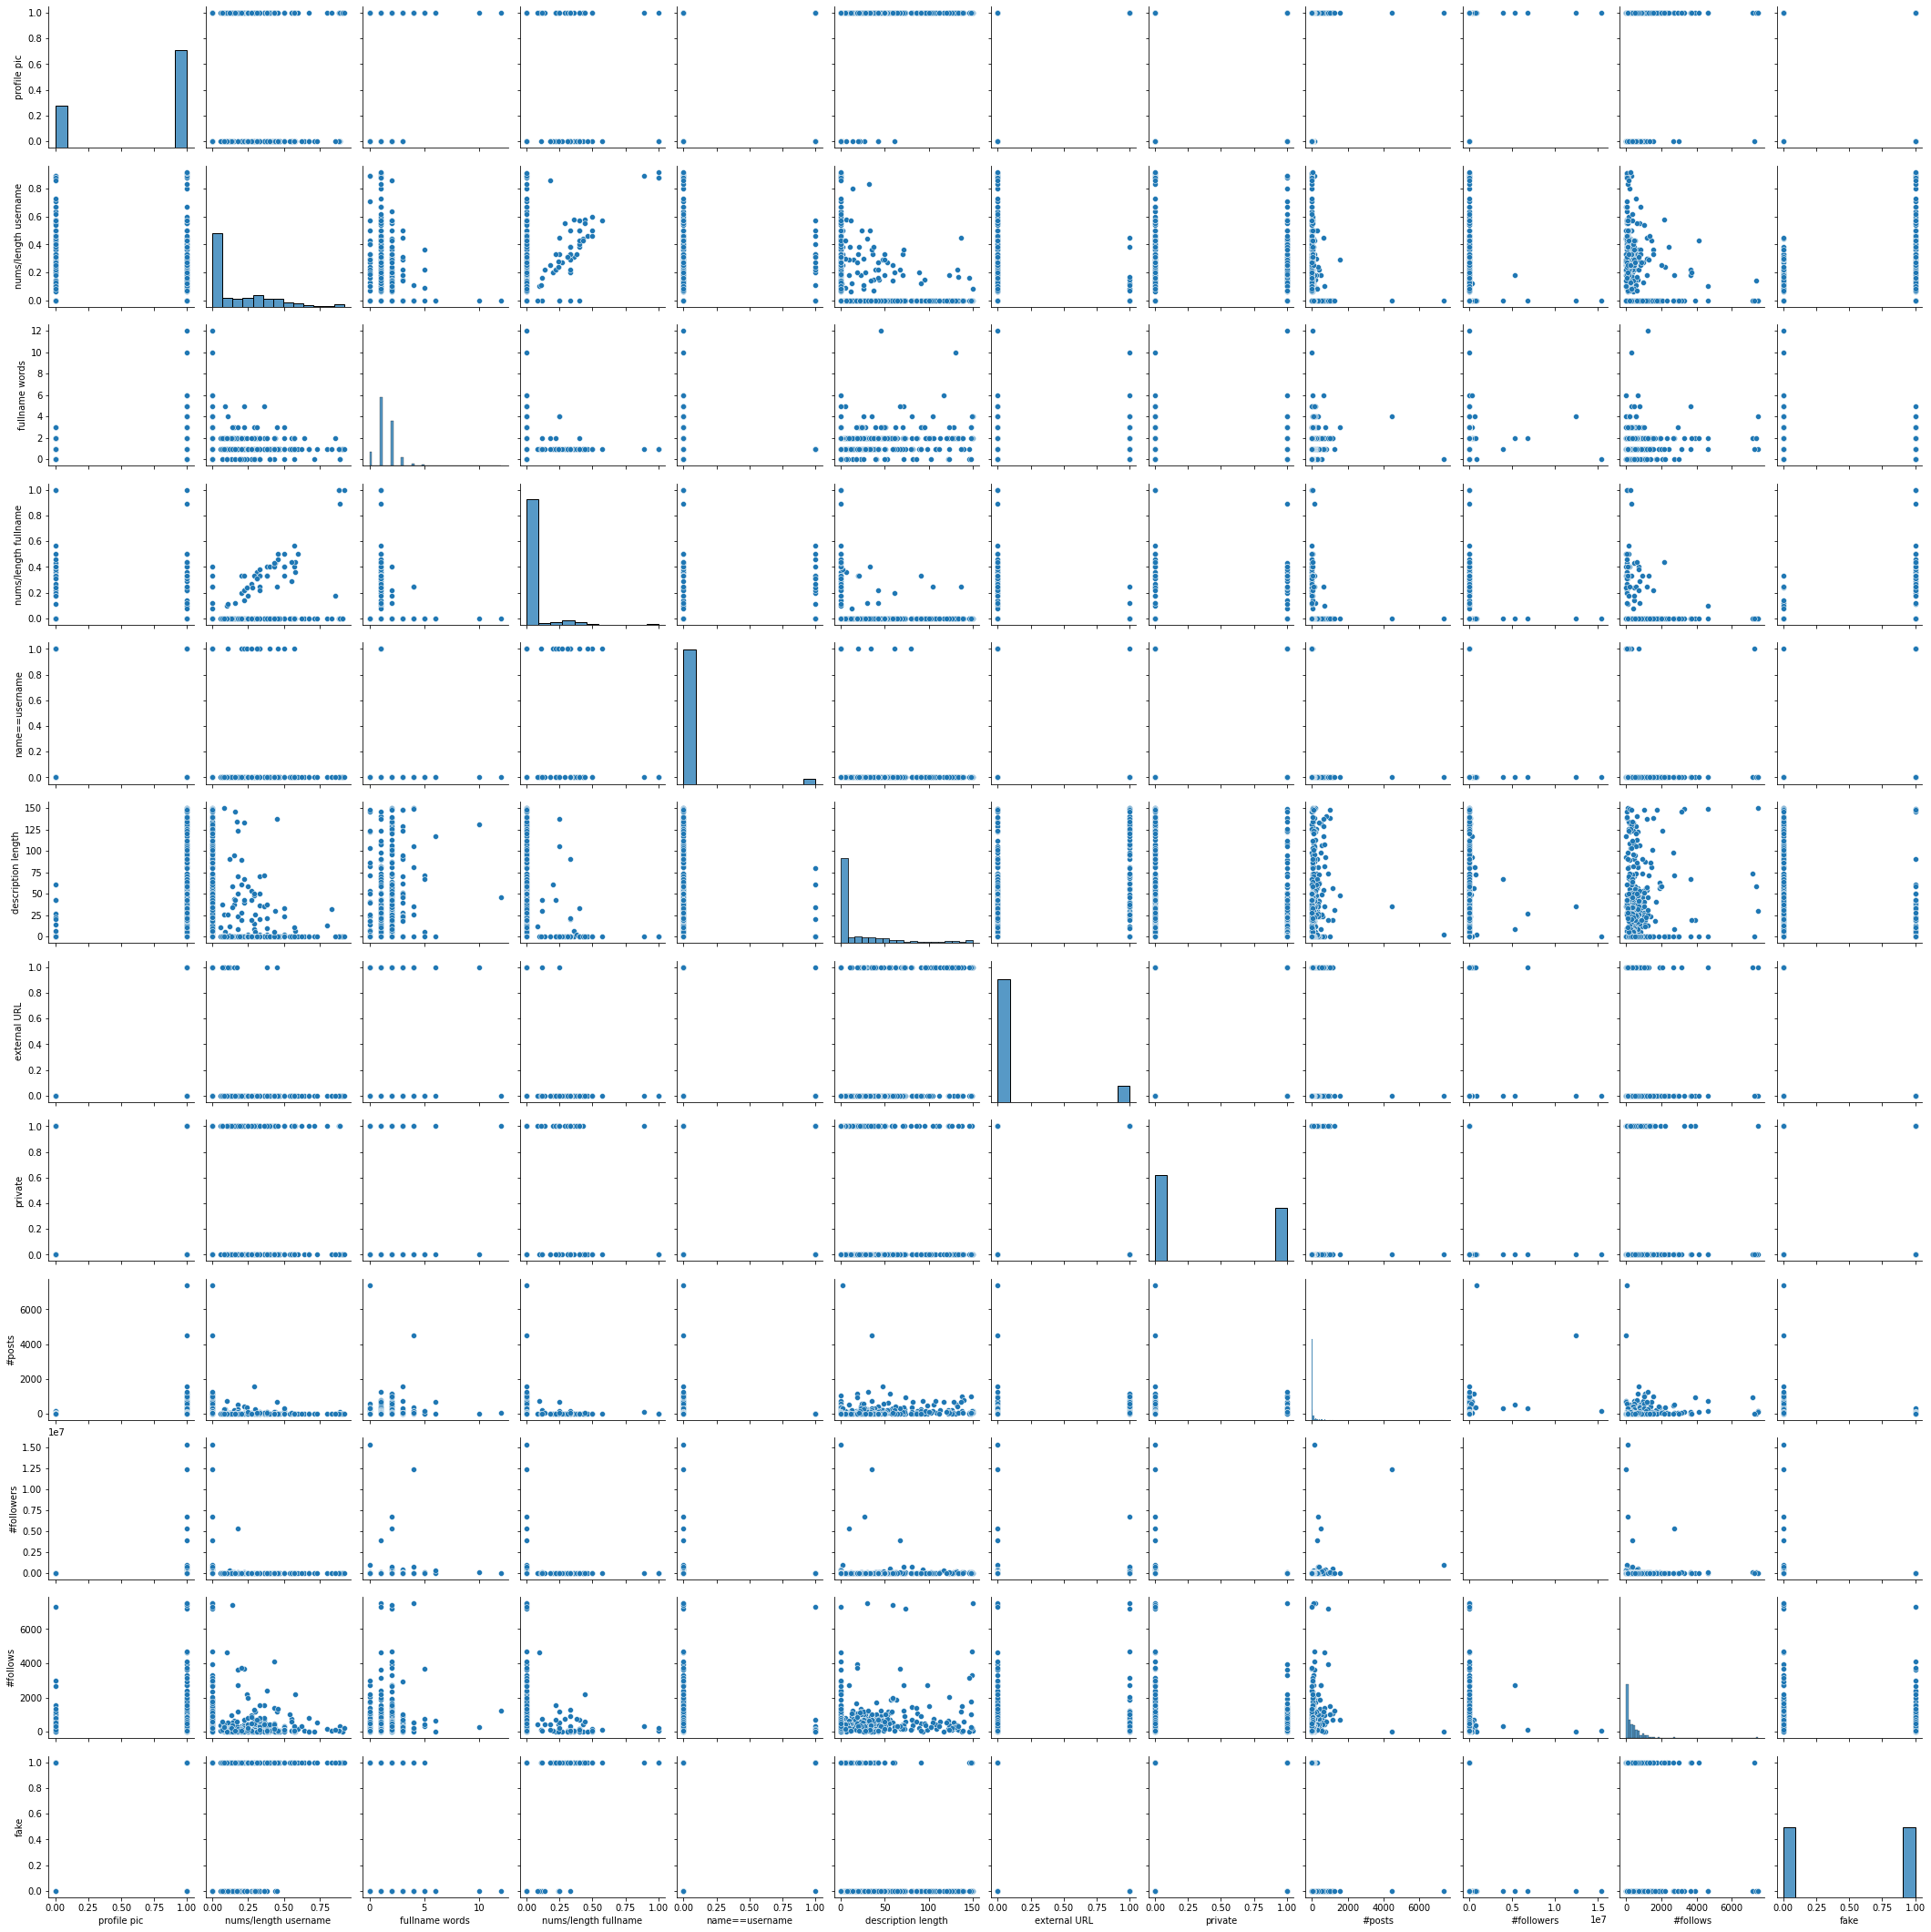

In [29]:
# Plot pairplot
plt.figure(figsize = (20, 20))
sns.pairplot(data_train)


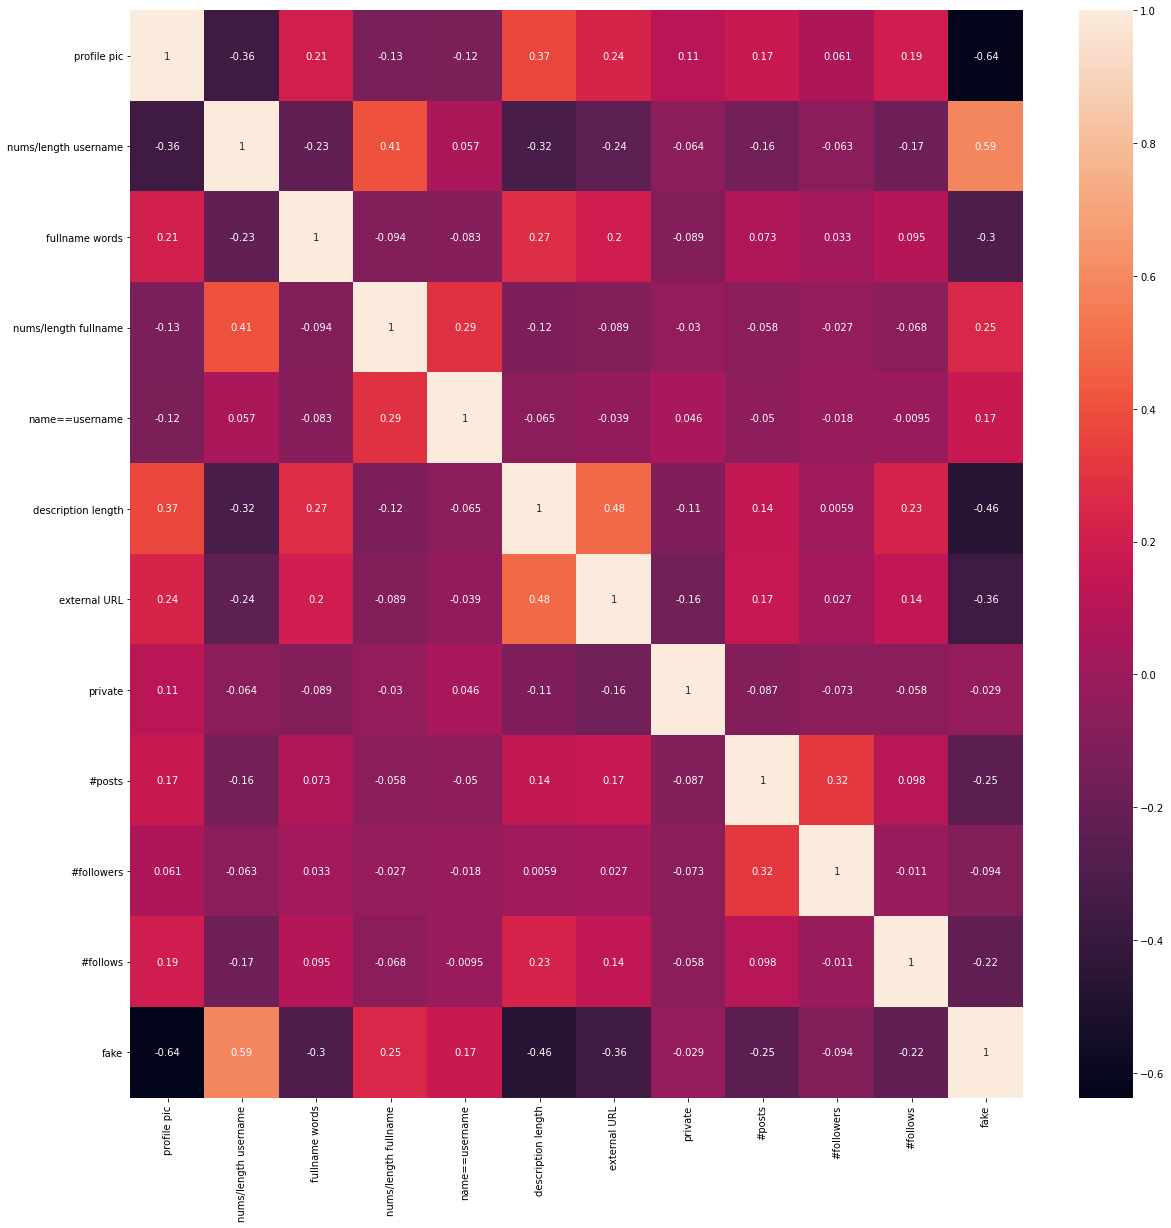

In [30]:
# Correlation plot
plt.figure(figsize=(20, 20))
cm = data_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


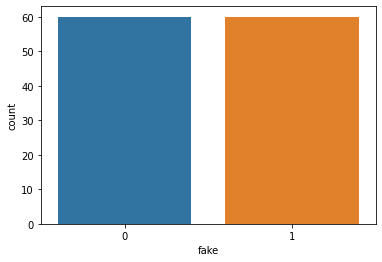

In [31]:
sns.countplot(data_test['fake'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


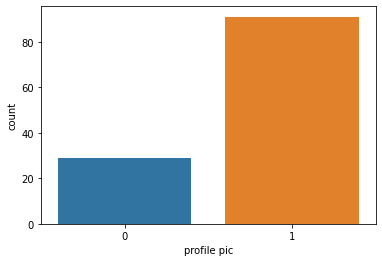

In [32]:
sns.countplot(data_test['profile pic'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


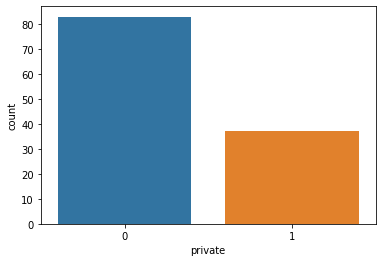

In [33]:
sns.countplot(data_test['private'])

# TASK #5: PREPARE THE DATA TO FEED THE MODEL

In [34]:
# Training and testing dataset (inputs)
X_train = data_train.drop(columns = ['fake'])
X_test = data_test.drop(columns = ['fake'])
X_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [35]:
X_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [36]:
# Training and testing dataset (Outputs)
y_train = data_train['fake']
y_test = data_test['fake']

In [37]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [38]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [39]:
# Scale the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [40]:

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [41]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [42]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [43]:
X_train.shape

(576, 11)

In [44]:
X_test.shape

(120, 11)

In [45]:
y_test.shape

(120, 2)

In [46]:
y_train.shape

(576, 2)

In [47]:
Training_data= len(X_train)/ (len(X_train) + len(X_test))*100
Training_data

82.75862068965517

In [48]:
Test_data= len(X_test)/ (len(X_train) + len(X_test))*100
Test_data

17.24137931034483

# TASK #6: BUILD AND TRAIN A SIMPLE DEEP LEARNING MODEL

In [49]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(50, input_dim=11, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                600       
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_4 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_5 (Dropout)          (None, 25)               

In [50]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [57]:
epochs_hist = model.fit(X_train, y_train, epochs = 20,  verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0665 - accuracy: 0.9807 - val_loss: 1.3136 - val_accuracy: 0.8966
Epoch 2/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0473 - accuracy: 0.9807 - val_loss: 0.9948 - val_accuracy: 0.9138
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9788 - val_loss: 1.5426 - val_accuracy: 0.8966
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9788 - val_loss: 1.1086 - val_accuracy: 0.8966
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9865 - val_loss: 1.0477 - val_accuracy: 0.9138
Epoch 6/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9865 - val_loss: 1.0787 - val_accuracy: 0.9138
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9884 - val_loss: 1.0114 - val_accuracy: 0.9310
Epoch 8/20
17/17 [==

# TASK #7: ASSESS THE PERORMANCE OF TRAINED MODEL

In [58]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


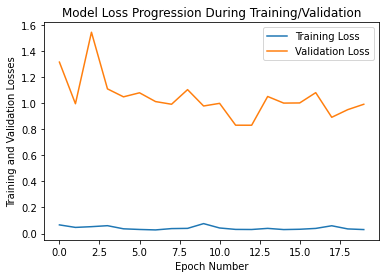

In [59]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [60]:
predicted = model.predict(X_test)

In [61]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

In [62]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        60
           1       0.90      0.88      0.89        60

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



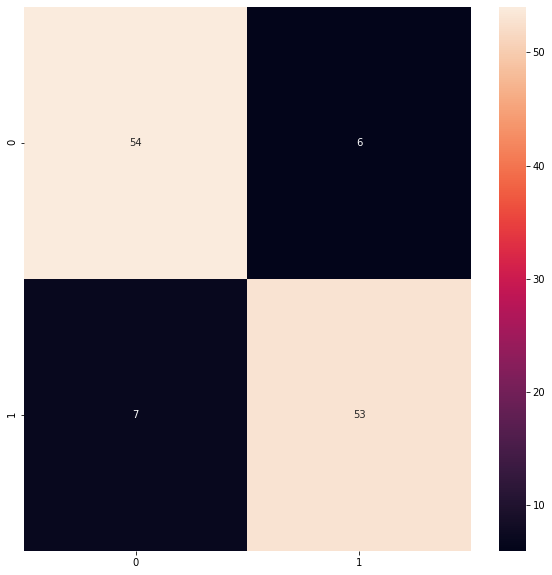

In [63]:
plt.figure(figsize=(10, 10))
cm= confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot= True)

#Thanks!